<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/Problem_Set_4_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import jax 
import jax.numpy as jnp 
import matplotlib.pyplot as plt 

> I want to encourage you to think of working with a colab notebook as working with a state of the art calculator 

### **Sample from a Distribution**

To sample from a **discrete** distribution we need to specify the following pieces of information
1. `key`: random seed 
2. `a`: Array of Values 
3. `shape`: Number of samples 
4. `p`: Array of Probabilities of sampling each value

We pass these values as arguments to the sampling function `jax.random.choice`

In [6]:
samples = jax.random.choice(key=jax.random.PRNGKey(0), a=jnp.array([100., 50.]), shape=(1000,), p = jnp.array([0.25, 0.75]))

### **Plot Samples**

To plot samples from a distribution, we can pass the samples to the function `plt.hist`. After doing so, we can then call `plt.show()` to produce the plot. To get some feel for how this works, consider changing `a` or `p` in the line above

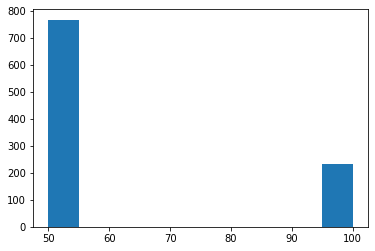

In [7]:
plt.hist(samples)
plt.show()

### **Vectorizing a Function**

We will often find is useful to apply a function that takes a scalar and returns a scalar, and enable it to take a vector as an input and return a vector as an output. We can do so explicity, by applying `jax.vmap` to the function. That is, if `f` is a maps from $\mathcal{R} \to \mathcal{R}$, we can extend it to a function that maps from $\mathcal{R}^n \to \mathcal{R}^n$ as follows: `jax.vmap(f)`. 

Below, we take a utility function defined on $\mathcal{R}$ and extend it so that it can take our the array of samples as an input!

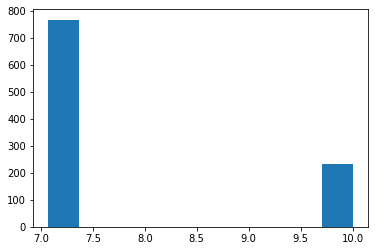

In [11]:
def utility_fn(x):
  return jnp.sqrt(x)

utility_of_samples = jax.vmap(utility_fn)(samples)

plt.hist(utility_of_samples)
plt.show()

### **Creating Arrays => The Graph of a Function**

As you have probably sensed, it's very helpful to be able to create arrays. For instance, if we want to plot the graph of the demand function, we'll want to (1) create an array of different prices, (2) `vmap` the demand function and then apply the result to this array of prices, and then (3) plot the array of prices and the corresponding quantity demanded. To create an array that continues values between two endpoints, we can use the function `jnp.linspace`. We pass three arguments to this function (starting value, ending value, number of points).

To plot the graph of the function we use the function `plt.plot` and pass in as separate inputs the two arrays.

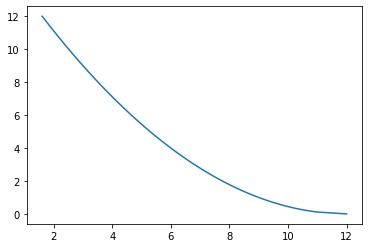

In [20]:
ps = jnp.linspace(0, 12, 100)

def demand(p):
  return 12 - 3*p**0.5 

qs = jax.vmap(demand)(ps)

plt.plot(qs, ps)
plt.show()

### **Computing Gradients**

One nice part about writing math on the computer is that we can easily compute gradients. To do so, we simply call `jax.grad` on the function of interest and then apply the result to the input. 

In [21]:
jax.grad(demand)(2.)

DeviceArray(-1.0606601, dtype=float32, weak_type=True)

Now, what's really nice is that `jax.grad(demand)` is just a function, we so we can vectorize it and then plot its graph too!

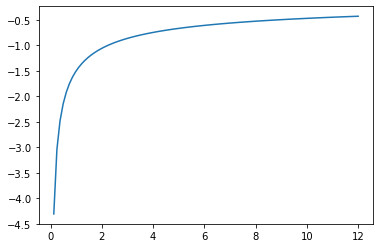

In [23]:
deriv = jax.vmap(jax.grad(demand))(ps)
plt.plot(ps, deriv)
plt.show()

### **Anonymous Functions**

The first topic we covered when write math on the computer was how to define a function. We emphasized that to define a function, we needed to use the keyword `def`. It turns out though that there exists an alternative way to define function. We can do so with an keyword `lambda` as follows. (Note, if you are following along, you should be able to read everything in the following block!)

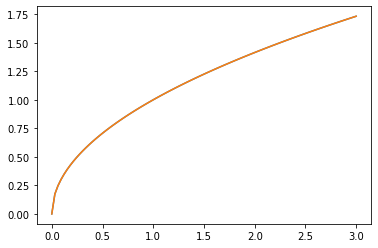

In [13]:
def f0(x):
  return jnp.sqrt(x)

f1 = lambda x : jnp.sqrt(x)

xs = jnp.linspace(0, 3, 100)
ys1 = jax.vmap(f0)(xs)
ys2 = jax.vmap(f1)(xs)

plt.plot(xs, ys1)
plt.plot(xs, ys2)
plt.show()

### **Summing Across Columns**

In [14]:
xs = jnp.arange(9).reshape(-1,3)
xs

DeviceArray([[0, 1, 2],
             [3, 4, 5],
             [6, 7, 8]], dtype=int32)

In [15]:
jnp.sum(xs, axis=0)

DeviceArray([ 9, 12, 15], dtype=int32)

In [16]:
jnp.sum(xs, axis=1)

DeviceArray([ 3, 12, 21], dtype=int32)